# Exam #3 - Classification

In [79]:
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report,average_precision_score, accuracy_score, roc_auc_score,roc_curve, auc,precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore')

## Load the train and test sets if the `occupancy data`. Explore the datasets lightly

In [80]:
df_train = pd.read_csv('occupancy_data_train.csv')
df_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1
1,23.15,27.2675,429.5,714.00,0.004783,1
2,23.15,27.2450,426.0,713.50,0.004779,1
3,23.15,27.2000,426.0,708.25,0.004772,1
4,23.10,27.2000,426.0,704.50,0.004757,1


In [81]:
df_test = pd.read_csv('occupancy_data_test.csv')
df_test.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1


In [82]:
df_train.shape, df_test.shape

((8143, 6), (2665, 6))

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 381.8 KB


In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 125.0 KB


In [85]:
df_train.shape, df_test.shape

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [86]:
df_train.isna().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

We have no nan vals in our data sets, also ve have only numerical values, what makes our life easier

let's see summary statistics

In [87]:
df_train.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [88]:
df_test.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [89]:
df_train.Occupancy.value_counts()/len(df_train)*100

0    78.767039
1    21.232961
Name: Occupancy, dtype: float64

In [90]:
df_test.Occupancy.value_counts()/len(df_test)*100

0    63.527205
1    36.472795
Name: Occupancy, dtype: float64

As we can see, we have different proportions in target feature in train and test sets

Let's plot our feat`ures

In [91]:
df_train.columns

Index(['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

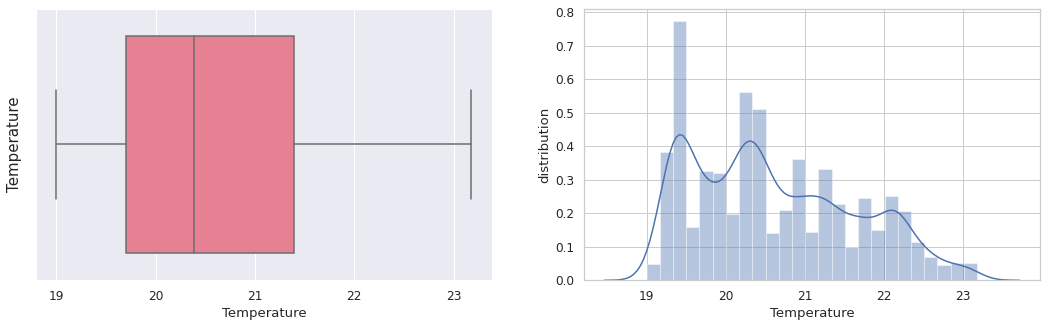

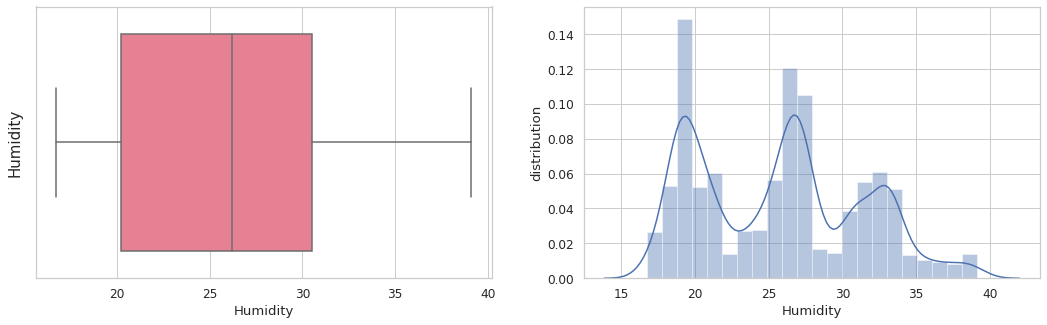

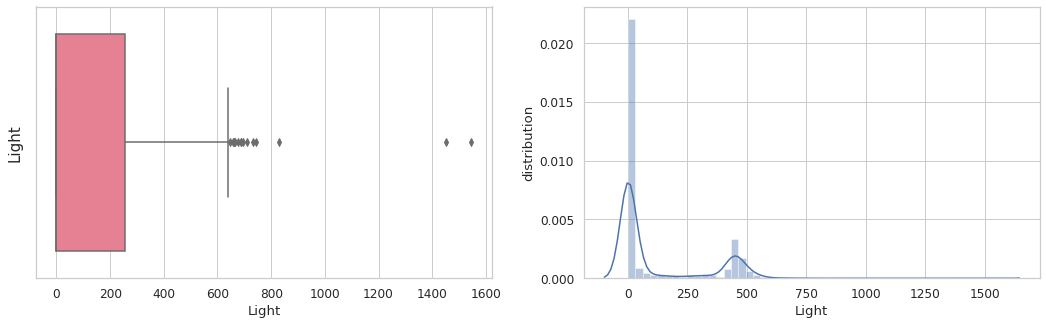

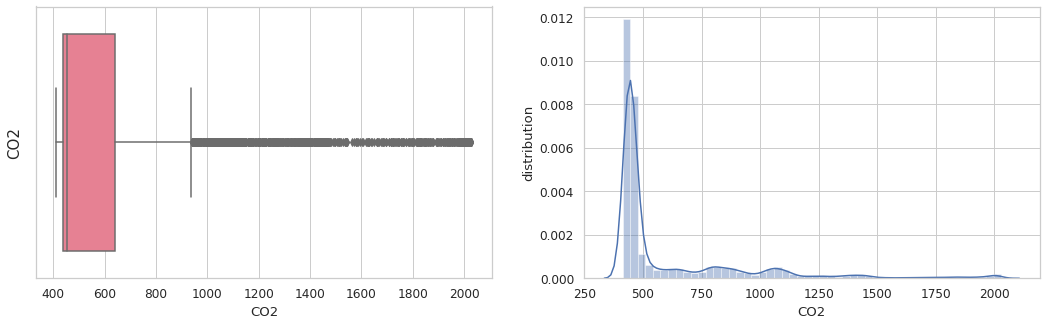

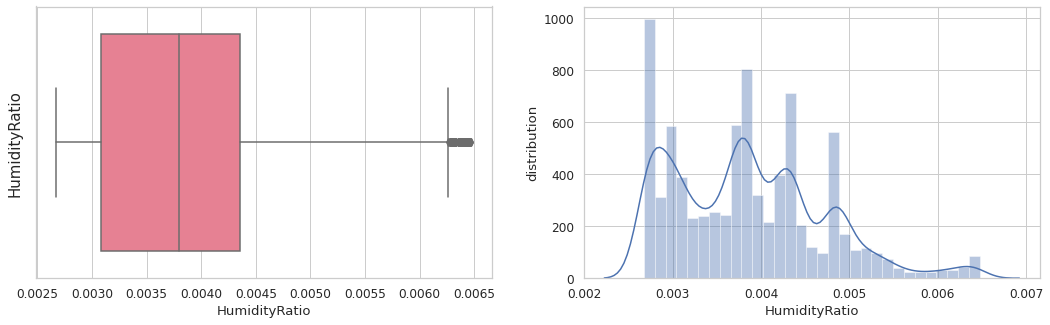

In [92]:
dens =['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']

for var in dens:
    plt.figure(figsize=(18,5))
    plt.subplot(1, 2, 1)
   
    sns.set_style('whitegrid')
    fig = sns.boxplot(df_train[var], palette='husl')
    fig.set_title('')
    fig.set_ylabel(var,fontsize=15)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_train[var])
   
    fig.set_ylabel('distribution')
    fig.set_xlabel(var)

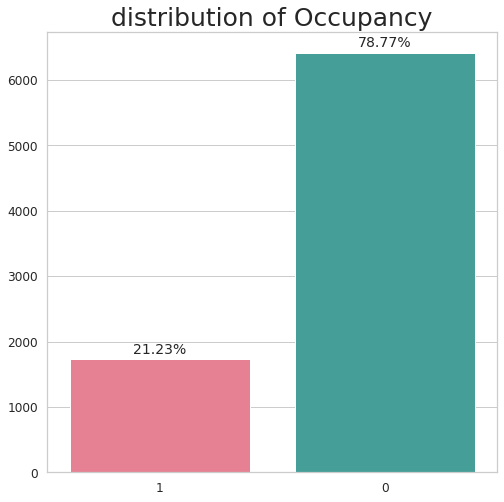

In [93]:
bars=['Occupancy']
fig, ax = plt.subplots(figsize=(20,10))
for i,col in enumerate(bars):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.title(f'distribution of {col}', fontsize=25)
    df=df_train.groupby([col]).size()
    bar =sns.barplot(data = df, x=df.index,palette='husl', y=df.values)
    bar.set_xticklabels(reversed(df.index.tolist()))
    for p in bar.patches:
        bar.annotate('{}%'.format(round(p.get_height()/len(df_train)*100,2), '.2f'), \
                       (p.get_x() + p.get_width() / 2.,p.get_height()),ha = 'center', \
                       va = 'center',xytext = (0, 10),textcoords = 'offset points',size = 14)
    fig.subplots_adjust(top=1.3)

In [94]:
df_train.Occupancy.value_counts()/len(df_train)

0    0.78767
1    0.21233
Name: Occupancy, dtype: float64

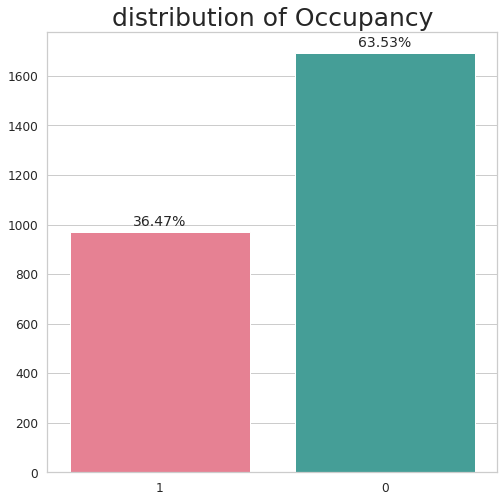

In [95]:
bars=['Occupancy']
fig, ax = plt.subplots(figsize=(20,10))
for i,col in enumerate(bars):
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.title(f'distribution of {col}', fontsize=25)
    df=df_test.groupby([col]).size()
    bar =sns.barplot(data = df, x=df.index,palette='husl', y=df.values)
    bar.set_xticklabels(reversed(df.index.tolist()))
    for p in bar.patches:
        bar.annotate('{}%'.format(round(p.get_height()/len(df_test)*100,2), '.2f'), \
                       (p.get_x() + p.get_width() / 2.,p.get_height()),ha = 'center', \
                       va = 'center',xytext = (0, 10),textcoords = 'offset points',size = 14)
    fig.subplots_adjust(top=1.3)

Well, in train set we have an imballanced data, but in train set it seems not so bad

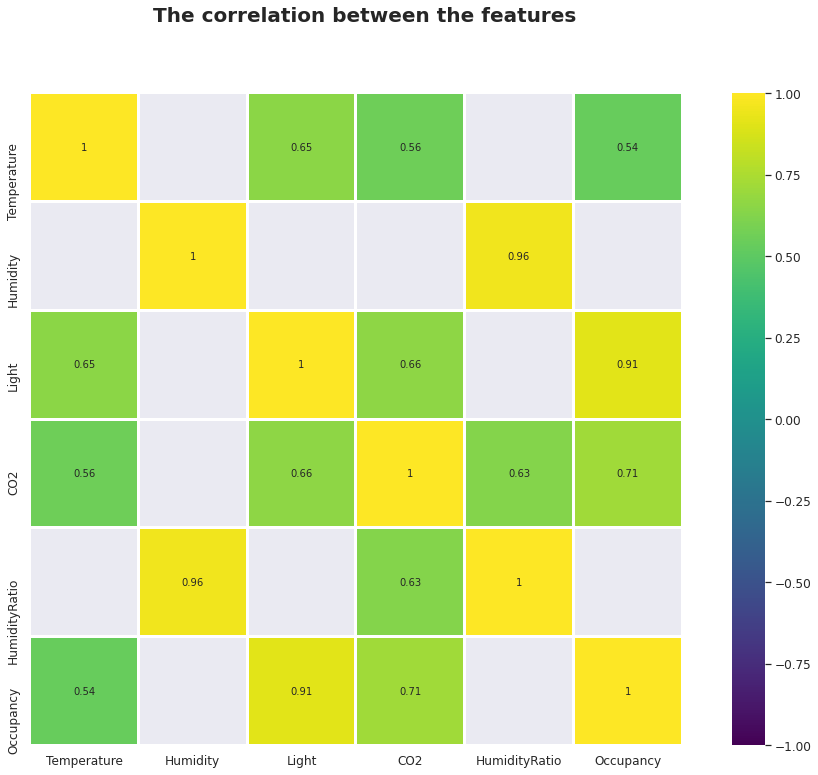

In [96]:
corr = df_train.corr()
f = plt.figure(figsize=(18, 12))

sns.set(font_scale=1.1)
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=2,
            annot=True, annot_kws={"size": 10}, square=True)
f.suptitle('The correlation between the features',fontsize=20, fontweight='bold')
plt.show()

we see a very high correlation between the 'Humidity' and 'HumidityRatio'. One feature duplicates another one, so we will drop it

Also the feature 'Light' correlates with our target feature, 'CO2' and 'Temperature', so we will also drop it

In [97]:
df_train.shape, df_test.shape

((8143, 6), (2665, 6))

In [98]:
train = df_train.drop(['Humidity', 'Light'], axis=1)
test = df_test.drop(['Humidity', 'Light'], axis=1)

In [99]:
train.shape, test.shape

((8143, 4), (2665, 4))

## Choose a model, and predict the `occupancy` of the test set

Why did you choose this model? What are the pros and cons of using this model?
What preprocessing steps did you have to take to use this model? What steps were you able to skip?

We will choose the Random forest algorithm.
It can be used for both classifications and regression task.
It provides higher accuracy.
Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.

All  preprocessing steps  we have made to use this model, so let's continue

In [100]:
X_train = train.drop(columns=['Occupancy'], axis=1)
y_train = train['Occupancy']
X_test = test.drop(columns=['Occupancy'], axis=1)
y_test = test['Occupancy']


In [101]:
X_train.shape, X_test.shape

((8143, 3), (2665, 3))

In [102]:
y_train.shape,y_test.shape

((8143,), (2665,))

In [103]:
clf_forest = RandomForestClassifier(n_estimators=100, random_state=2)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [113]:
y_pred = clf_forest.predict(X_test)

In [118]:
def get_stats(model, x_test_input=X_test, y_test_input=y_train,
             x_train_inp=X_train, y_train_inp=y_train):
    y_pred = np.round(model.predict(x_test_input))
    y_pred_train = np.round(model.predict(x_train_inp))
    accuracy_test = metrics.accuracy_score(y_test_input, y_pred)
    accuracy_train = metrics.accuracy_score(y_train_inp, y_pred_train)
    print("Accuracy Test: {0}".format(round(accuracy_test, 3)))
    print("Accuracy Train: {0}".format(round(accuracy_train, 3)))
    print(classification_report(y_test_input, y_pred))

In [119]:
get_stats(clf_forest, x_test_input=X_test, y_test_input=y_test,
             x_train_inp=X_train, y_train_inp=y_train)

Accuracy Test: 0.708
Accuracy Train: 1.0
              precision    recall  f1-score   support

           0       0.86      0.64      0.74      1693
           1       0.57      0.82      0.67       972

    accuracy                           0.71      2665
   macro avg       0.72      0.73      0.70      2665
weighted avg       0.76      0.71      0.71      2665



Well, we had an imballanced data, and  as we can see, RandomForestClissifier gave us 71% accuracy with recall 82% in predicting for label 1

## Write an ROC curve function, that will calculate and plot the ROC for predictions, from scratch

The function should receive a vector of predictions and a vector of true values, or a dataframe containing both.

For this task:

1. Use the prediction probabilities
2. Determine a range of thresholds 
3. For each threshold, calculate the TPR and FPR (in any way you'd like)
4. Plot the result of all calculated values on a line plot

In [121]:
def plot_ROC(rf,y_test, y_pred, X_test, X_train):
    fig = plt.figure(figsize = (18,5))
    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=1)
    precision, recall = np.round(precision, 2), np.round(recall, 2)
    # average precision score
    avg_precision = average_precision_score(y_test, rf.predict_proba(X_test)[:,1],pos_label=1)
    # precision auc
    pr_auc = auc(recall, precision)

    ax1 = plt.subplot(121)
    ax1.plot(recall, precision, lw=1, color='blue', label=f'AP={round(avg_precision,3)}; AUC={round(pr_auc,3)}') 
    plt.fill_between(recall, precision,-1, facecolor='lightblue', alpha=0.5)
    plt.xlabel('Recall (TPR)')
    plt.ylim(0,1)

    plt.ylabel('Precision')
    plt.legend(loc="best")
    plt.title('PR Curve for Occupancy');

    # calculate AUC-ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    ns_probs = [0 for _ in range(len(y_test))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

    ax2 = plt.subplot(122)
    ax2.plot(fpr, tpr, lw=1, color='green',label=f"AUC-ROC = {round(roc_auc,4)}") 
    ax2.plot(ns_fpr, ns_tpr, color='grey',linestyle='--', label='Baseline')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc="best")
    plt.title('AUC-ROC Curve for Occupancy');

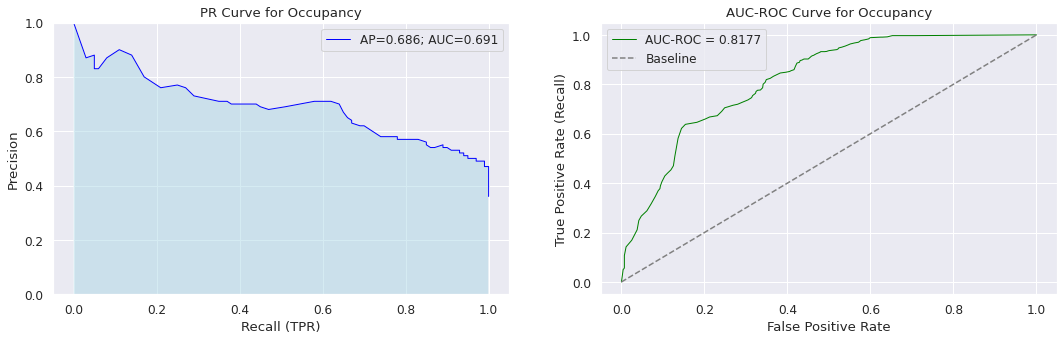

In [122]:
plot_ROC(clf_forest,y_test, y_pred, X_test, X_train)

## Compare your ROC curve to a ready-made curve from a package of your choice

How did you do? Are there any differences?

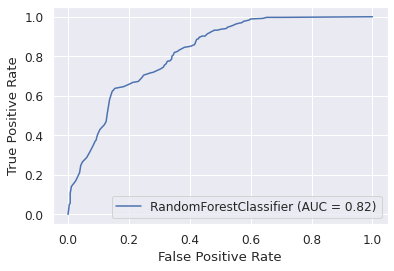

In [128]:
metrics.plot_roc_curve(clf_forest,X_test, y_test)

## Display the confusion matrix if the threshold is 0.5. What are the recall and precision?

Sum Axis-1 as Total Accuracy: 0.7080675422138837


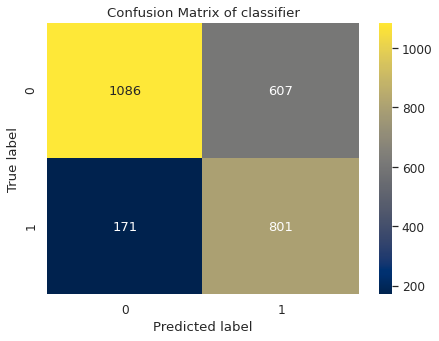

In [123]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(7,5))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, annot_kws={"size": 13},fmt="d", cmap=plt.cm.cividis)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix of classifier')

    acc = accuracy_score(ytest, yhat)
    print(f"Sum Axis-1 as Total Accuracy: {acc}")
    
draw_confusionmatrix(y_test, y_pred)


## Calculate your model's Recall and precision, if the threshold is 0.7, and if the threshold is 0.3

What does this result mean from a business standpoint? Compare the results to the 0.5 thresold model

In [131]:
precision, recall, thresholds = precision_recall_curve(y_test, clf_forest.predict_proba(X_test)[:,1], pos_label=1)

#i will leave it like it is . Just have no more time 

## Explain - How does you model perform? How would you present the results to your business stake holder? Include information on the features contribution to the model

Present relevant plots and business conclusions, including steps for improvement.

In [27]:
# your code here

## Bonus - Interpret your False Positives using SHAP

Present a summary review on all FP classified samples, as well as some interesting individual sample interpretations

How can you analyze the results?

In [28]:
# your code here